# Filter-based feature selection
In this project, I used three common filter-based feature selection methods on two datasets and compared the results. 

Feature selection refers to the process of applying statistical tests to input values given a specified output, to determine which columns are more correlated with the output. By choosing the right features, you can potentially improve the accuracy and efficiency of classification.

## Data exploration

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)# display all the columns
data1 = pd.read_csv('a_20s_1600_Het_h_0.4MAF_0.2_r_50_EDM-2_01.txt', sep = "\t")# read in dataset
data2 = pd.read_csv('a_20s_1600her_0.4__maf_0.2_EDM-2_01.txt', sep = "\t")# read in datasetcount(*)

In [2]:
data1.head()

,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,N15,M0P0,M1P0,M2P0,M3P0,Class
0,0,0,1,1,0,0,2,0,0,2,2,0,0,1,2,0,1,1,1,1,1
1,0,2,1,1,0,1,0,0,0,1,1,0,0,2,1,0,1,1,1,1,1
2,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,1,0,1,1
3,0,2,0,1,0,0,0,0,0,1,1,0,0,2,0,0,1,1,1,1,1
4,0,0,1,1,0,0,1,1,0,0,0,0,0,1,1,1,1,1,1,0,1


In [3]:
data2.head()

,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,N15,N16,N17,M0P0,M0P1,Class
0,0,0,0,0,0,0,0,2,0,0,1,2,1,2,1,0,1,0,1,1,1
1,1,0,0,0,0,1,1,1,0,0,0,1,0,1,1,0,0,1,1,1,1
2,0,0,0,1,0,0,0,2,0,0,0,1,0,1,1,0,0,0,0,0,1
3,0,0,0,1,2,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1
4,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1


In [4]:
print ('In dataset 1')
print ("Number of rows: " + str(data1.shape[0])) # row count
print ("Number of columns: " + str(data1.shape[1])) # column count
print ('In dataset 2')
print ("Number of rows: " + str(data2.shape[0])) # row count
print ("Number of columns: " + str(data2.shape[1])) # column count

In dataset 1
Number of rows: 1600
Number of columns: 21
In dataset 2
Number of rows: 1600
Number of columns: 21


In [5]:
data1.describe() 

,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,N15,M0P0,M1P0,M2P0,M3P0,Class
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000
mean,0.081250,0.719375,0.379375,0.806250,0.072500,0.837500,0.488125,0.653125,0.354375,1.007500,0.515000,0.080625,0.258750,0.83875,0.900000,0.403750,0.530000,0.53000,0.518750,0.516250,0.500000
std,0.275583,0.675211,0.560710,0.691202,0.264173,0.703671,0.611427,0.668455,0.541042,0.715202,0.630495,0.285790,0.477693,0.71191,0.687601,0.569815,0.579275,0.60152,0.581902,0.572224,0.500156
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.500000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,1.000000


In [6]:
data2.describe() 

,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,N15,N16,N17,M0P0,M0P1,Class
count,1600.000000,1600.00000,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000
mean,0.222500,0.41250,0.21750,0.890625,0.888125,0.142500,0.335625,1.024375,0.114375,0.595000,0.688750,0.875000,0.798750,0.85375,0.791875,0.281250,0.682500,0.33000,0.396875,0.426250,0.500000
std,0.439448,0.55343,0.43768,0.687537,0.706874,0.358503,0.523834,0.675697,0.328041,0.652872,0.666822,0.702448,0.701645,0.68202,0.678304,0.481968,0.680612,0.51601,0.561972,0.576427,0.500156
min,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,0.00000,0.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.500000
75%,0.000000,1.00000,0.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
max,2.000000,2.00000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,1.000000


In [7]:
data1.isnull().values.any() # check missing data

False

In [8]:
data2.isnull().values.any() # check missing data

False

### Mutual information (MI)
The mutual information (MI) is a measure of the amount of information that one random variable has about another variable. <br>
MI between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency. <br>
Mutual Information "is not concerned" whether the association is linear or not.

In [9]:
from sklearn.feature_selection import mutual_info_classif # Mutual information for a discrete target.
from sklearn.feature_selection import SelectKBest

In [10]:
X_1 = data1.iloc[:, :-1].values
y_1 = data1.iloc[:, -1].values
X_2 = data2.iloc[:, :-1].values
y_2 = data2.iloc[:, -1].values

Dataset 1

In [11]:
d1_mutual_information = mutual_info_classif(X_1, y_1)

Text(0.5,1.2,'Dataset 1 Importance (mutual_info_classif)')

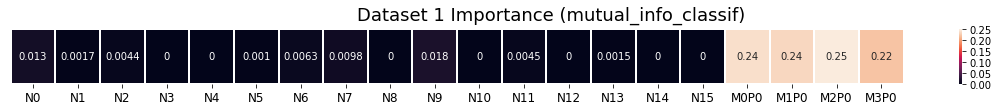

In [12]:
plt.subplots(1, figsize=(20, 1))
sns.heatmap(d1_mutual_information[:, np.newaxis].T,linewidths=1, annot=True)
plt.yticks([], [])
plt.gca().set_xticklabels(data1.columns[:-1], fontsize=12)
plt.suptitle('Dataset 1 Importance (mutual_info_classif)', fontsize=18, horizontalalignment = 'center',y = 1.2)

In [13]:
d1_selecter = SelectKBest(mutual_info_classif, k=5).fit(X_1, y_1)
d1_selected_feature = d1_selecter.get_support()

In [14]:
def show_features(dataset, selected_feature):
    name = []
    for i in dataset.columns:
        name.append(i)
    for i in range(0,len(name) - 1):
        if selected_feature[i]:
            print(name[i]) 

In [15]:
show_features(data1,d1_selected_feature)

N6
M0P0
M1P0
M2P0
M3P0


Dataset 2

In [16]:
d2_mutual_information = mutual_info_classif(X_2, y_2)

Text(0.5,1.2,'Dataset 2 Importance (mutual_info_classif)')

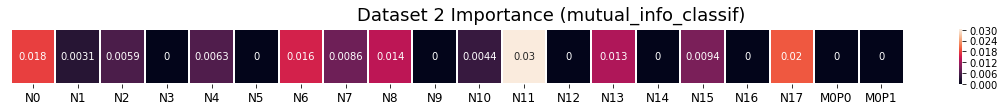

In [17]:
plt.subplots(1, figsize=(20, 1))
sns.heatmap(d2_mutual_information[:, np.newaxis].T,linewidths=1, annot=True)
plt.yticks([], [])
plt.gca().set_xticklabels(data2.columns[:-1], fontsize=12)
plt.suptitle('Dataset 2 Importance (mutual_info_classif)', fontsize=18, horizontalalignment = 'center',y = 1.2)

In [18]:
d2_selecter = SelectKBest(mutual_info_classif, k=5).fit(X_2, y_2)
d2_selected_feature = d2_selecter.get_support()

In [19]:
show_features(data2,d2_selected_feature)

N2
N5
N6
N9
N11


Based on the result, MI seems fail to detect epistasis pattern when applied on this dataset.

### ANOVA F-value
If the features are quantitative, compute the ANOVA F-value between each feature and the target vector.<br>
The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different.<br>
F-Test checks for and only captures linear relationships between features and labels. A highly correlated feature is given higher score and less correlated features are given lower score.
Correlation is highly deceptive as it doesn’t capture strong non-linear relationships.

In [20]:
from sklearn.feature_selection import f_classif

Dataset 1

In [21]:
d1_fvalue_selector = SelectKBest(f_classif, k=5).fit(X_1, y_1)
d1_selected_feature = d1_fvalue_selector.get_support()

In [22]:
show_features(data1,d1_selected_feature)

N4
M0P0
M1P0
M2P0
M3P0


Dataset 2

In [23]:
d2_fvalue_selector = SelectKBest(f_classif, k=5).fit(X_2, y_2)
d2_selected_feature = d2_fvalue_selector.get_support()

In [24]:
show_features(data2,d2_selected_feature)

N2
N5
N13
N14
M0P0


# Chi-squared
The chi-square test is a statistical test of independence to determine the dependency of two variables. <br>
It can also be used for continuous variable, but the continuous variable needs to be categorized first. <br>
Computes chi-squared stats between each non-negative feature and class.<br>
This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.<br>
Using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.
 

In [25]:
from sklearn.feature_selection import chi2

Dataset 1

In [26]:
d1_chi2_selector = SelectKBest(f_classif, k=5).fit(X_1, y_1)
d1_selected_feature = d1_chi2_selector.get_support()

In [27]:
show_features(data1,d1_selected_feature)

N4
M0P0
M1P0
M2P0
M3P0


Dataset 2

In [28]:
d2_chi2_selector = SelectKBest(f_classif, k=5).fit(X_2, y_2)
d2_selected_feature = d2_chi2_selector.get_support()

In [29]:
show_features(data2,d2_selected_feature)

N2
N5
N13
N14
M0P0


# Scikit-rebate
scikit-rebate is a scikit-learn-compatible Python implementation of ReBATE, a suite of Relief-based feature selection algorithms for Machine Learning. 
It is especially good at identifying feature interactions that are normally overlooked by standard feature selection methods.
Relief-based algorithms are commonly applied to genetic analyses, where epistasis (i.e., feature interactions) is common. 

In [30]:
from skrebate import ReliefF

Dataset 1

In [31]:
d1_rebate_selector = ReliefF(n_features_to_select = 5).fit(X_1, y_1)
for feature_name, feature_score in zip(data1.columns, d1_rebate_selector.feature_importances_):
    print(feature_name, '\t', feature_score)

N0 	 0.0028624999999999983
N1 	 0.0011187499999999987
N2 	 0.0064562499999999984
N3 	 0.006268750000000005
N4 	 0.0006625000000000002
N5 	 0.000787499999999997
N6 	 0.004662500000000002
N7 	 0.004524999999999999
N8 	 0.0037437500000000036
N9 	 0.0018812499999999977
N10 	 0.0009125000000000001
N11 	 0.001956249999999991
N12 	 0.005250000000000005
N13 	 0.001831250000000005
N14 	 0.008325000000000006
N15 	 0.004918750000000006
M0P0 	 0.39539999999999875
M1P0 	 0.3949624999999988
M2P0 	 0.42558124999999947
M3P0 	 0.38843749999999866


In [32]:
#retrieve a list of indices for the top scoring features ranked by increasing score
d1_rebate_selector.top_features_

array([18, 16, 17, 19, 14,  2,  3, 12, 15,  6,  7,  8,  0, 11,  9, 13,  1,
       10,  5,  4])

In [33]:
import collections
scoreDict = collections.defaultdict(int)
i = 0
for n in data1.columns:
        
    scoreDict[n] = d1_rebate_selector.feature_importances_[i]
    i += 1
    if i == 20:
        break

In [34]:
scored_features = len(d1_rebate_selector.top_features_)
sorted_names = sorted(scoreDict, key=lambda x: scoreDict[x], reverse=True)
n = 1
for k in sorted_names:
    if n < scored_features +1 :
        print(k, '\t', scoreDict[k],'\t',n) 
    else:
        print(k, '\t', scoreDict[k],'\t','*') 
    n += 1
    if n == 6:
        break

M2P0 	 0.42558124999999947 	 1
M0P0 	 0.39539999999999875 	 2
M1P0 	 0.3949624999999988 	 3
M3P0 	 0.38843749999999866 	 4
N14 	 0.008325000000000006 	 5


Dataset2

In [35]:
d2_rebate_selector = ReliefF(n_features_to_select = 5).fit(X_2, y_2)
for feature_name, feature_score in zip(data2.columns, d2_rebate_selector.feature_importances_):
    print(feature_name, '\t', feature_score)

N0 	 -0.0047250000000000035
N1 	 -0.006956249999999993
N2 	 -0.003125
N3 	 -0.008787500000000002
N4 	 -0.010581249999999992
N5 	 -0.0034874999999999997
N6 	 -0.006993750000000007
N7 	 -0.011374999999999993
N8 	 -0.0019749999999999993
N9 	 -0.005262500000000007
N10 	 -0.009487500000000005
N11 	 -0.00693125
N12 	 -0.007637499999999993
N13 	 -0.00986874999999999
N14 	 -0.01215625000000001
N15 	 -0.0038999999999999964
N16 	 -0.0053750000000000065
N17 	 -0.009093750000000017
M0P0 	 0.1381249999999998
M0P1 	 0.13474374999999977


In [36]:
#retrieve a list of indices for the top scoring features ranked by increasing score
d2_rebate_selector.top_features_

array([18, 19,  8,  2,  5, 15,  0,  9, 16, 11,  1,  6, 12,  3, 17, 10, 13,
        4,  7, 14])

In [37]:
import collections
scoreDict2 = collections.defaultdict(int)
i = 0
for n in data2.columns:
        
    scoreDict2[n] = d2_rebate_selector.feature_importances_[i]
    i += 1
    if i == 20:
        break

In [38]:
scored_features = len(d2_rebate_selector.top_features_)
sorted_names = sorted(scoreDict2, key=lambda x: scoreDict2[x], reverse=True)
n = 1
for k in sorted_names:
    if n < scored_features +1 :
        print(k, '\t', scoreDict2[k],'\t',n) 
    else:
        print(k, '\t', scoreDict2[k],'\t','*') 
    n += 1
    if n == 6:
        break

M0P0 	 0.1381249999999998 	 1
M0P1 	 0.13474374999999977 	 2
N8 	 -0.0019749999999999993 	 3
N2 	 -0.003125 	 4
N5 	 -0.0034874999999999997 	 5


Reference:<br>
https://stats.stackexchange.com/questions/81659/mutual-information-versus-correlation
http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest
https://www.programcreek.com/python/example/93974/sklearn.feature_selection.SelectKBest
https://chrisalbon.com/machine_learning/feature_selection/anova_f-value_for_feature_selection/
https://epistasislab.github.io/scikit-rebate/using/#acquiring-feature-importance-scores
